In [1]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

#set up stepfunction (learning rate)
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

#apply step function
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])


In [49]:
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):

    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i] - y_hat == 1:
            W[0] = W[0] + (learn_rate*X[i][0])
            W[1] = W[1] + (learn_rate*X[i][1])
            b = b + learn_rate
        elif y[i]-y_hat == -1:
            W[0] = W[0] - (learn_rate*X[i][0])
            W[1] = W[1] - (learn_rate*X[i][1])
            b = b - learn_rate
        return W, b 

    
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for index in range(len(X)):
        x1 = X[index][0]
        x2 = X[index][1]
        y_hat = x1 * W[0] + x2*W[1] + b
        
        if y_hat > 0:
            W[0] = W[0] + (learn_rate*X[index][0])
            W[1] = W[1] + (learn_rate*X[index][1])
            b = b + learn_rate
        else:
            W[0] = W[0] - (learn_rate*X[index][0])
            W[1] = W[1] - (learn_rate*X[index][1])
            b = b - learn_rate
        return W, b 

In [50]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [68]:
import pandas as pd

#read in data
data = pd.read_csv('data.csv', header = None)
#data.head()

#grab first two columns as the input features
X = data.iloc[:,[0,1]]
#third column as label
y = data[2]

print(X.head())
print(y.head())

         0         1
0  0.78051 -0.063669
1  0.28774  0.291390
2  0.40714  0.178780
3  0.29230  0.421700
4  0.50922  0.352560
0    1
1    1
2    1
3    1
4    1
Name: 2, dtype: int64


In [54]:
#returns the slope and intercept of the boundary lines
trainPerceptronAlgorithm(X, y)

[(array([-1.49520687]), array([-4.76821391])),
 (array([-1.50700142]), array([-4.75568778])),
 (array([-1.51856961]), array([-4.74340205])),
 (array([-1.5299179]), array([-4.73134986])),
 (array([-1.54105251]), array([-4.71952461])),
 (array([-1.5519794]), array([-4.70791996])),
 (array([-1.56270434]), array([-4.69652978])),
 (array([-1.57323287]), array([-4.6853482])),
 (array([-1.58357035]), array([-4.67436952])),
 (array([-1.59372192]), array([-4.66358828])),
 (array([-1.60369256]), array([-4.6529992])),
 (array([-1.61348705]), array([-4.64259718])),
 (array([-1.62311004]), array([-4.63237731])),
 (array([-1.63256597]), array([-4.62233486])),
 (array([-1.64185917]), array([-4.61246523])),
 (array([-1.6509938]), array([-4.60276401])),
 (array([-1.65997389]), array([-4.59322692])),
 (array([-1.66880332]), array([-4.58384983])),
 (array([-1.67748585]), array([-4.57462875])),
 (array([-1.68602512]), array([-4.56555981])),
 (array([-1.69442464]), array([-4.55663929])),
 (array([-1.702687

<IPython.core.display.Javascript object>


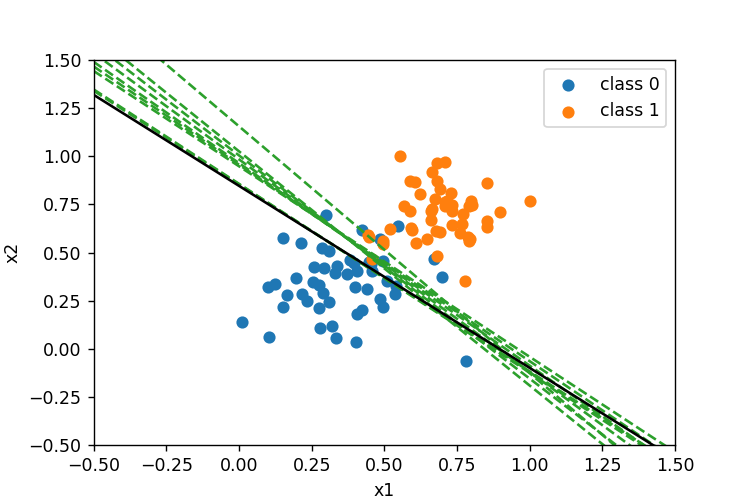

In [67]:
%matplotlib notebook

# Boundary lines for each epoch, CAN UPDATE alpha or epochs
boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.03, num_epochs = 10)

# Plotting
x = np.linspace(-0.5, 1.5)
fig, ax = plt.subplots(1,1, figsize=(6,4))

# plot points
ax.scatter(df.loc[:49,'x1'], df.loc[:49,'x2'], label='class 0', marker='o')
ax.scatter(df.loc[50:,'x1'], df.loc[50:,'x2'], label='class 1', marker='o')

# plot boundary lines
for (slope, intercept) in boundary_lines[:-1]:
    ax.plot(x, slope*x + intercept, ls='--', color='C2')
    plt.show()
ax.plot(x, boundary_lines[-1][0]*x + boundary_lines[-1][1], color='k')

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='best')
plt.show()